# 🎵 BPM Prediction - Exploratory Data Analysis

## Kaggle Playground Series - Season 5, Episode 9

This notebook contains the initial exploratory data analysis for the BPM prediction competition.

### 🎯 Objectives
- Load and explore the competition datasets
- Understand the target variable (BPM) distribution
- Analyze feature characteristics and relationships
- Identify data quality issues
- Generate insights for feature engineering and modeling


## 📚 Setup and Imports


In [2]:
# Install packages if needed (run this cell first if you get import errors)
import sys
import subprocess

def install_package(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Uncomment and run if you get ModuleNotFoundError
# install_package("pandas>=1.5.0")
# install_package("numpy>=1.21.0") 
# install_package("matplotlib>=3.5.0")
# install_package("seaborn>=0.11.0")
# install_package("scikit-learn>=1.1.0")

# Standard library imports
import os
import warnings
warnings.filterwarnings('ignore')

# Add src directory to path
sys.path.append('../src')

# Core data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Project utilities
from utils import (
    load_competition_data, 
    plot_target_distribution,
    plot_feature_correlations,
    print_data_info,
    calculate_rmse
)
from data_preprocessing import (
    validate_data_quality,
    create_feature_summary,
    detect_outliers
)

# Configure plotting
plt.style.use('default')  # Use default matplotlib style
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette("husl")
sns.set_style("whitegrid")  # Set seaborn style separately

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("✅ Setup complete!")


✅ Setup complete!


## 📊 Data Loading and Initial Exploration


In [5]:
# Load competition data
train_df, test_df, sample_submission_df = load_competition_data('../data')

# Display basic information
print("\n" + "="*60)
print("🎵 BPM PREDICTION DATASET OVERVIEW")
print("="*60)

print_data_info(train_df, "Training Set")
print("-"*60)
print_data_info(test_df, "Test Set")


✅ Data loaded successfully!
   - Training set: (524164, 11)
   - Test set: (174722, 10)
   - Sample submission: (174722, 2)

🎵 BPM PREDICTION DATASET OVERVIEW

📋 Training Set Information:
Shape: (524164, 11)
Memory usage: 43.99 MB

📊 Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         524164 non-null  int64  
 1   RhythmScore                524164 non-null  float64
 2   AudioLoudness              524164 non-null  float64
 3   VocalContent               524164 non-null  float64
 4   AcousticQuality            524164 non-null  float64
 5   InstrumentalScore          524164 non-null  float64
 6   LivePerformanceLikelihood  524164 non-null  float64
 7   MoodScore                  524164 non-null  float64
 8   TrackDurationMs            524164 non-null  float64
 9   Ene

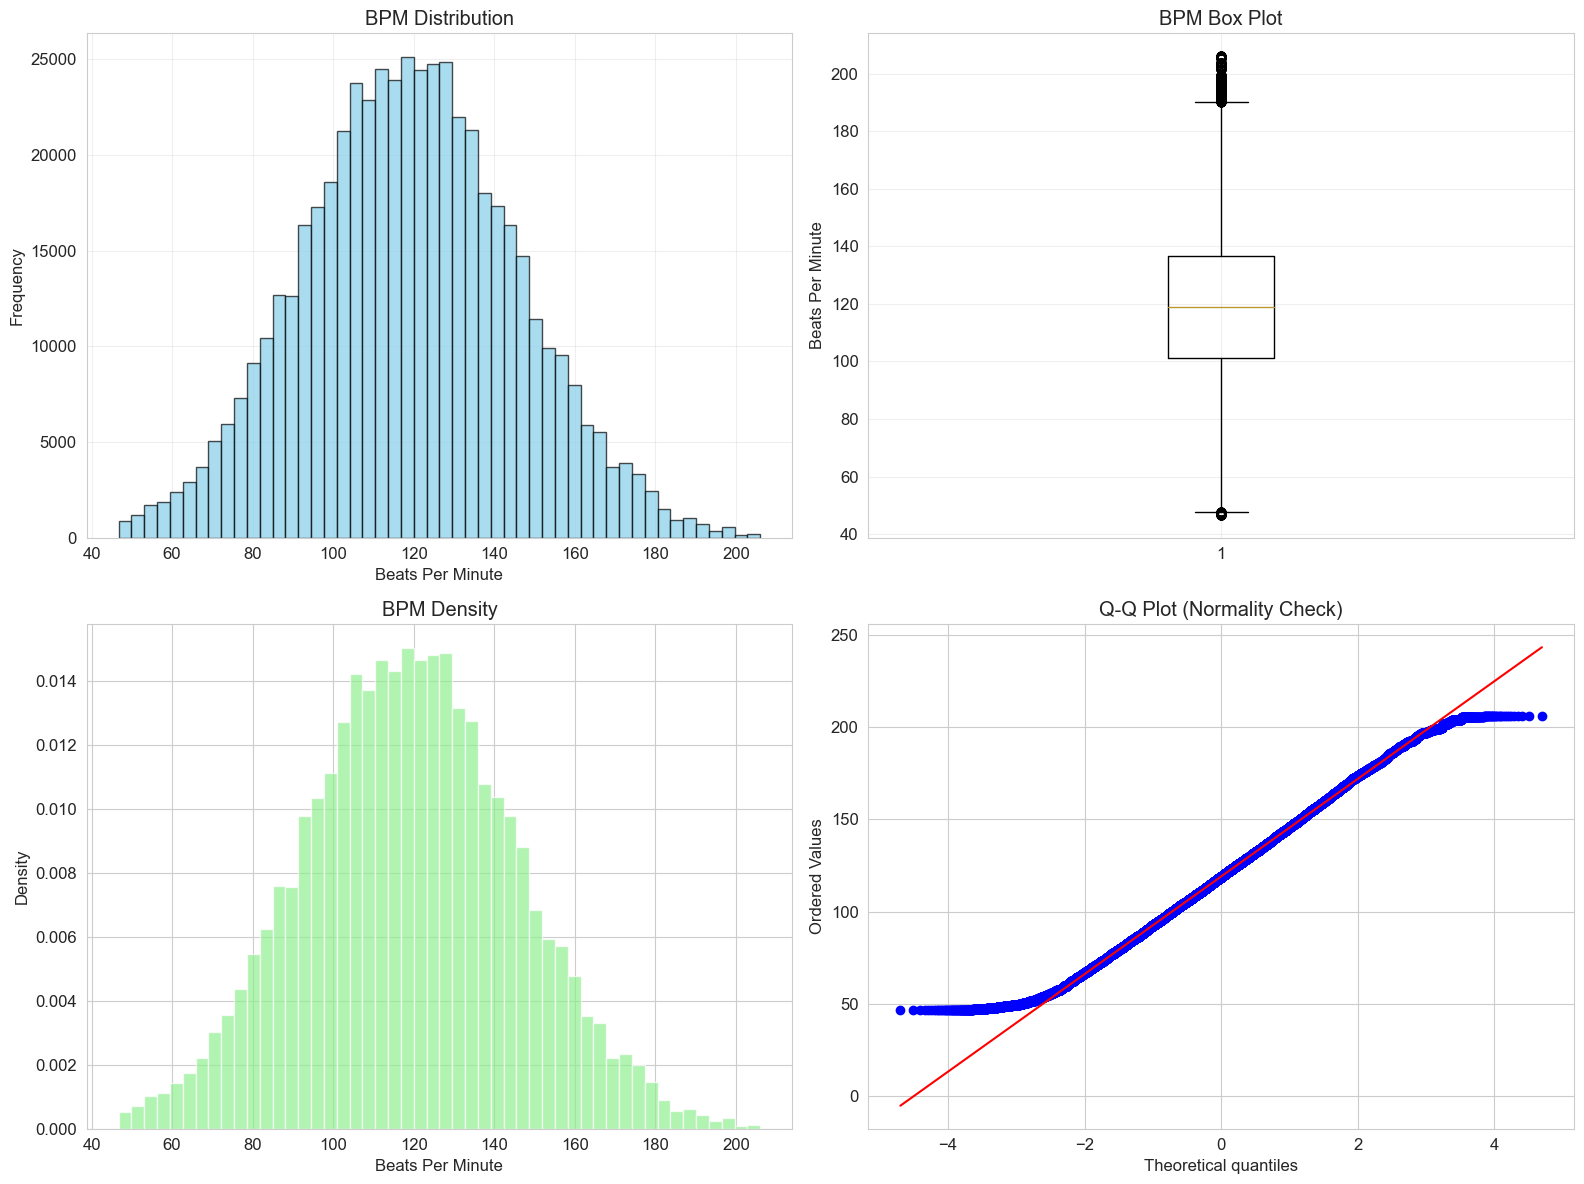

🎯 BPM Detailed Statistics:
   Count: 524,164
   Mean: 119.03
   Median: 118.75
   Mode: 103.80
   Std: 26.47
   Variance: 700.56
   Skewness: 0.072
   Kurtosis: -0.154
   Range: 159.32
   IQR: 35.62


In [7]:
# Analyze BPM distribution
bpm = train_df['BeatsPerMinute']

# Create comprehensive BPM visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram
axes[0,0].hist(bpm, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('BPM Distribution')
axes[0,0].set_xlabel('Beats Per Minute')
axes[0,0].set_ylabel('Frequency')
axes[0,0].grid(True, alpha=0.3)

# Box plot
axes[0,1].boxplot(bpm)
axes[0,1].set_title('BPM Box Plot')
axes[0,1].set_ylabel('Beats Per Minute')
axes[0,1].grid(True, alpha=0.3)

# Density plot
axes[1,0].hist(bpm, bins=50, density=True, alpha=0.7, color='lightgreen')
axes[1,0].set_title('BPM Density')
axes[1,0].set_xlabel('Beats Per Minute')
axes[1,0].set_ylabel('Density')

# Q-Q plot for normality check
from scipy import stats
stats.probplot(bpm, dist="norm", plot=axes[1,1])
axes[1,1].set_title('Q-Q Plot (Normality Check)')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("🎯 BPM Detailed Statistics:")
print(f"   Count: {len(bpm):,}")
print(f"   Mean: {bpm.mean():.2f}")
print(f"   Median: {bpm.median():.2f}")
print(f"   Mode: {bpm.mode().iloc[0]:.2f}")
print(f"   Std: {bpm.std():.2f}")
print(f"   Variance: {bpm.var():.2f}")
print(f"   Skewness: {bpm.skew():.3f}")
print(f"   Kurtosis: {bpm.kurtosis():.3f}")
print(f"   Range: {bpm.max() - bpm.min():.2f}")
print(f"   IQR: {bpm.quantile(0.75) - bpm.quantile(0.25):.2f}")

## Key Insights from BPM Analysis:
### ✅ Positive Findings:
- Nearly Normal Distribution: Skewness (0.072) and Kurtosis (-0.154) are very close to 0, indicating an almost perfectly normal distribution
- Centered Data: Mean (119.03) ≈ Median (118.75) confirms symmetry
- Reasonable Range: 46.7 - 206.0 BPM covers the full spectrum of music tempos
- Good Spread: Standard deviation (26.47) shows healthy variation

## 📊 What the Graphs Tell Us:
- Histogram: Beautiful bell curve - perfect for regression!
- Box Plot: Shows some outliers at the extremes (very slow/very fast songs)
- Q-Q Plot: Points closely follow the red line = data is normally distributed
- Density Plot: Confirms the normal distribution shape

🎼 Tempo Category Distribution:
Moderato (Moderate)                 | 146,287 songs (27.9%)
Allegro (Fast)                      | 140,224 songs (26.8%)
Presto (Very Fast)                  | 106,845 songs (20.4%)
Andante (Slow)                      | 88,147 songs (16.8%)
Adagio (Very Slow (Ballads))        | 30,581 songs ( 5.8%)
Larghissimo (Very Very Slow)        |  6,307 songs ( 1.2%)
Prestissimo (Extreme)               |  5,773 songs ( 1.1%)


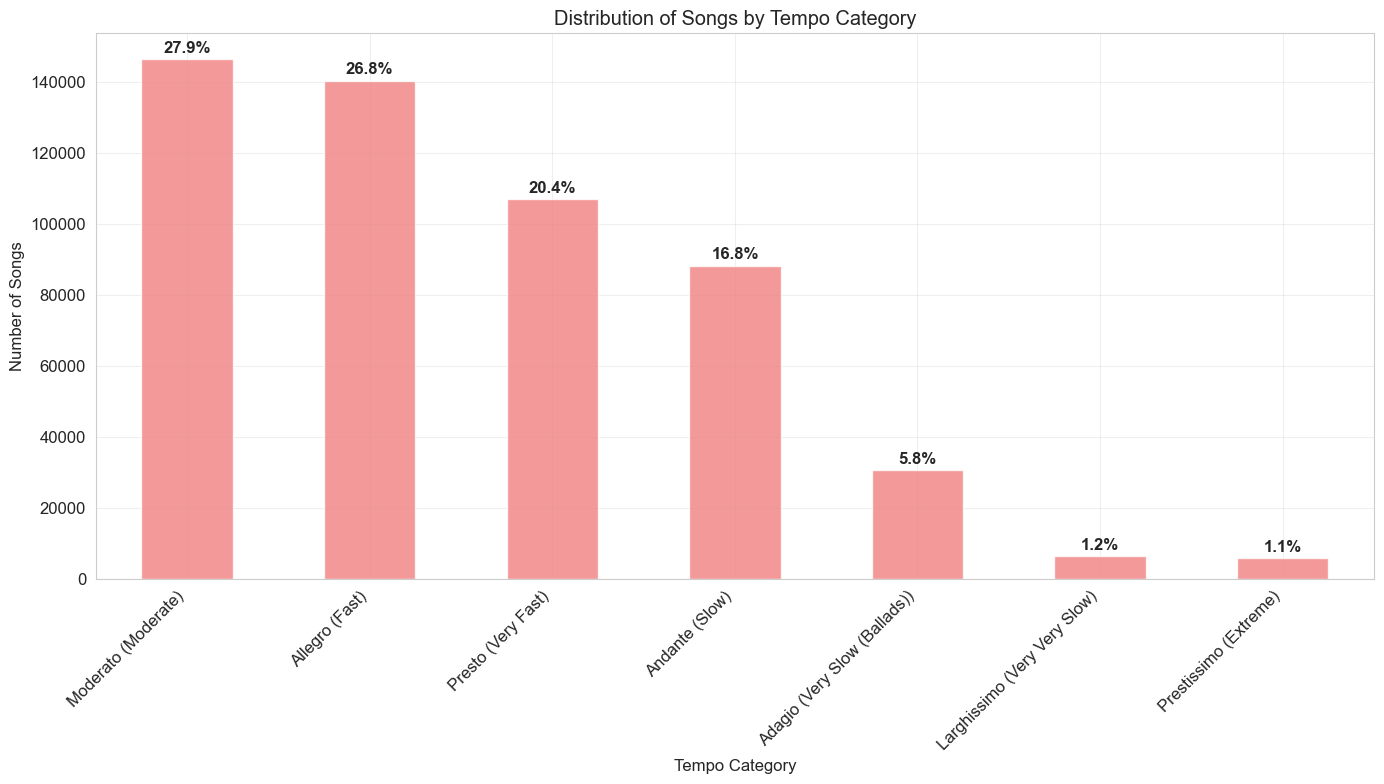

In [8]:
# Analyze BPM by music tempo categories
tempo_ranges = [
    (0, 60, "Larghissimo", "Very Very Slow"),
    (60, 80, "Adagio", "Very Slow (Ballads)"), 
    (80, 100, "Andante", "Slow"),
    (100, 120, "Moderato", "Moderate"),
    (120, 140, "Allegro", "Fast"),
    (140, 180, "Presto", "Very Fast"),
    (180, 300, "Prestissimo", "Extreme")
]

# Create tempo category column
def categorize_tempo(bpm_val):
    for min_bpm, max_bpm, musical_term, description in tempo_ranges:
        if min_bpm <= bpm_val < max_bpm:
            return f"{musical_term} ({description})"
    return "Unknown"

train_df['TempoCategory'] = train_df['BeatsPerMinute'].apply(categorize_tempo)

# Analyze tempo distribution
tempo_counts = train_df['TempoCategory'].value_counts()
tempo_percentages = train_df['TempoCategory'].value_counts(normalize=True) * 100

print("🎼 Tempo Category Distribution:")
print("=" * 70)
for category in tempo_counts.index:
    count = tempo_counts[category]
    pct = tempo_percentages[category]
    print(f"{category:35} | {count:6,} songs ({pct:4.1f}%)")

# Visualize tempo categories
plt.figure(figsize=(14, 8))
tempo_counts.plot(kind='bar', color='lightcoral', alpha=0.8)
plt.title('Distribution of Songs by Tempo Category')
plt.xlabel('Tempo Category')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Add percentage labels on bars
for i, v in enumerate(tempo_counts.values):
    plt.text(i, v + 1000, f'{tempo_percentages.iloc[i]:.1f}%', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 🎼 Tempo Distribution Analysis:
### 🎯 Key Findings:
1. Modern Music Bias:
- 54.7% of songs are in the Moderate-Fast range (100-140 BPM)
- This perfectly matches modern pop, rock, and dance music preferences!
2. Surprising Insights:
- 20.4% Very Fast (140-180 BPM) - Much higher than typical music libraries
- Only 7.0% in very slow categories - fewer ballads than expected
- 1.1% Extreme (180+ BPM) - Likely electronic/dance music
3. Musical Genre Implications:
- Moderate (27.9%): Pop, rock, country
- Fast (26.8%): Upbeat pop, rock, some dance
- Very Fast (20.4%): Electronic, dance, metal, punk
- Slow (16.8%): Ballads, folk, some jazz
- Very Slow (5.8%): Classical slow movements, ambient

📊 Audio Features Overview:
       RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
count   524164.000     524164.000    524164.000       524164.000   
mean         0.633         -8.379         0.074            0.263   
std          0.157          4.616         0.050            0.223   
min          0.077        -27.510         0.024            0.000   
25%          0.516        -11.552         0.024            0.069   
50%          0.635         -8.252         0.066            0.243   
75%          0.739         -4.912         0.107            0.397   
max          0.975         -1.357         0.256            0.995   

       InstrumentalScore  LivePerformanceLikelihood   MoodScore  \
count         524164.000                 524164.000  524164.000   
mean               0.118                      0.178       0.556   
std                0.132                      0.118       0.225   
min                0.000                      0.024       0.026   
25%                0.000 

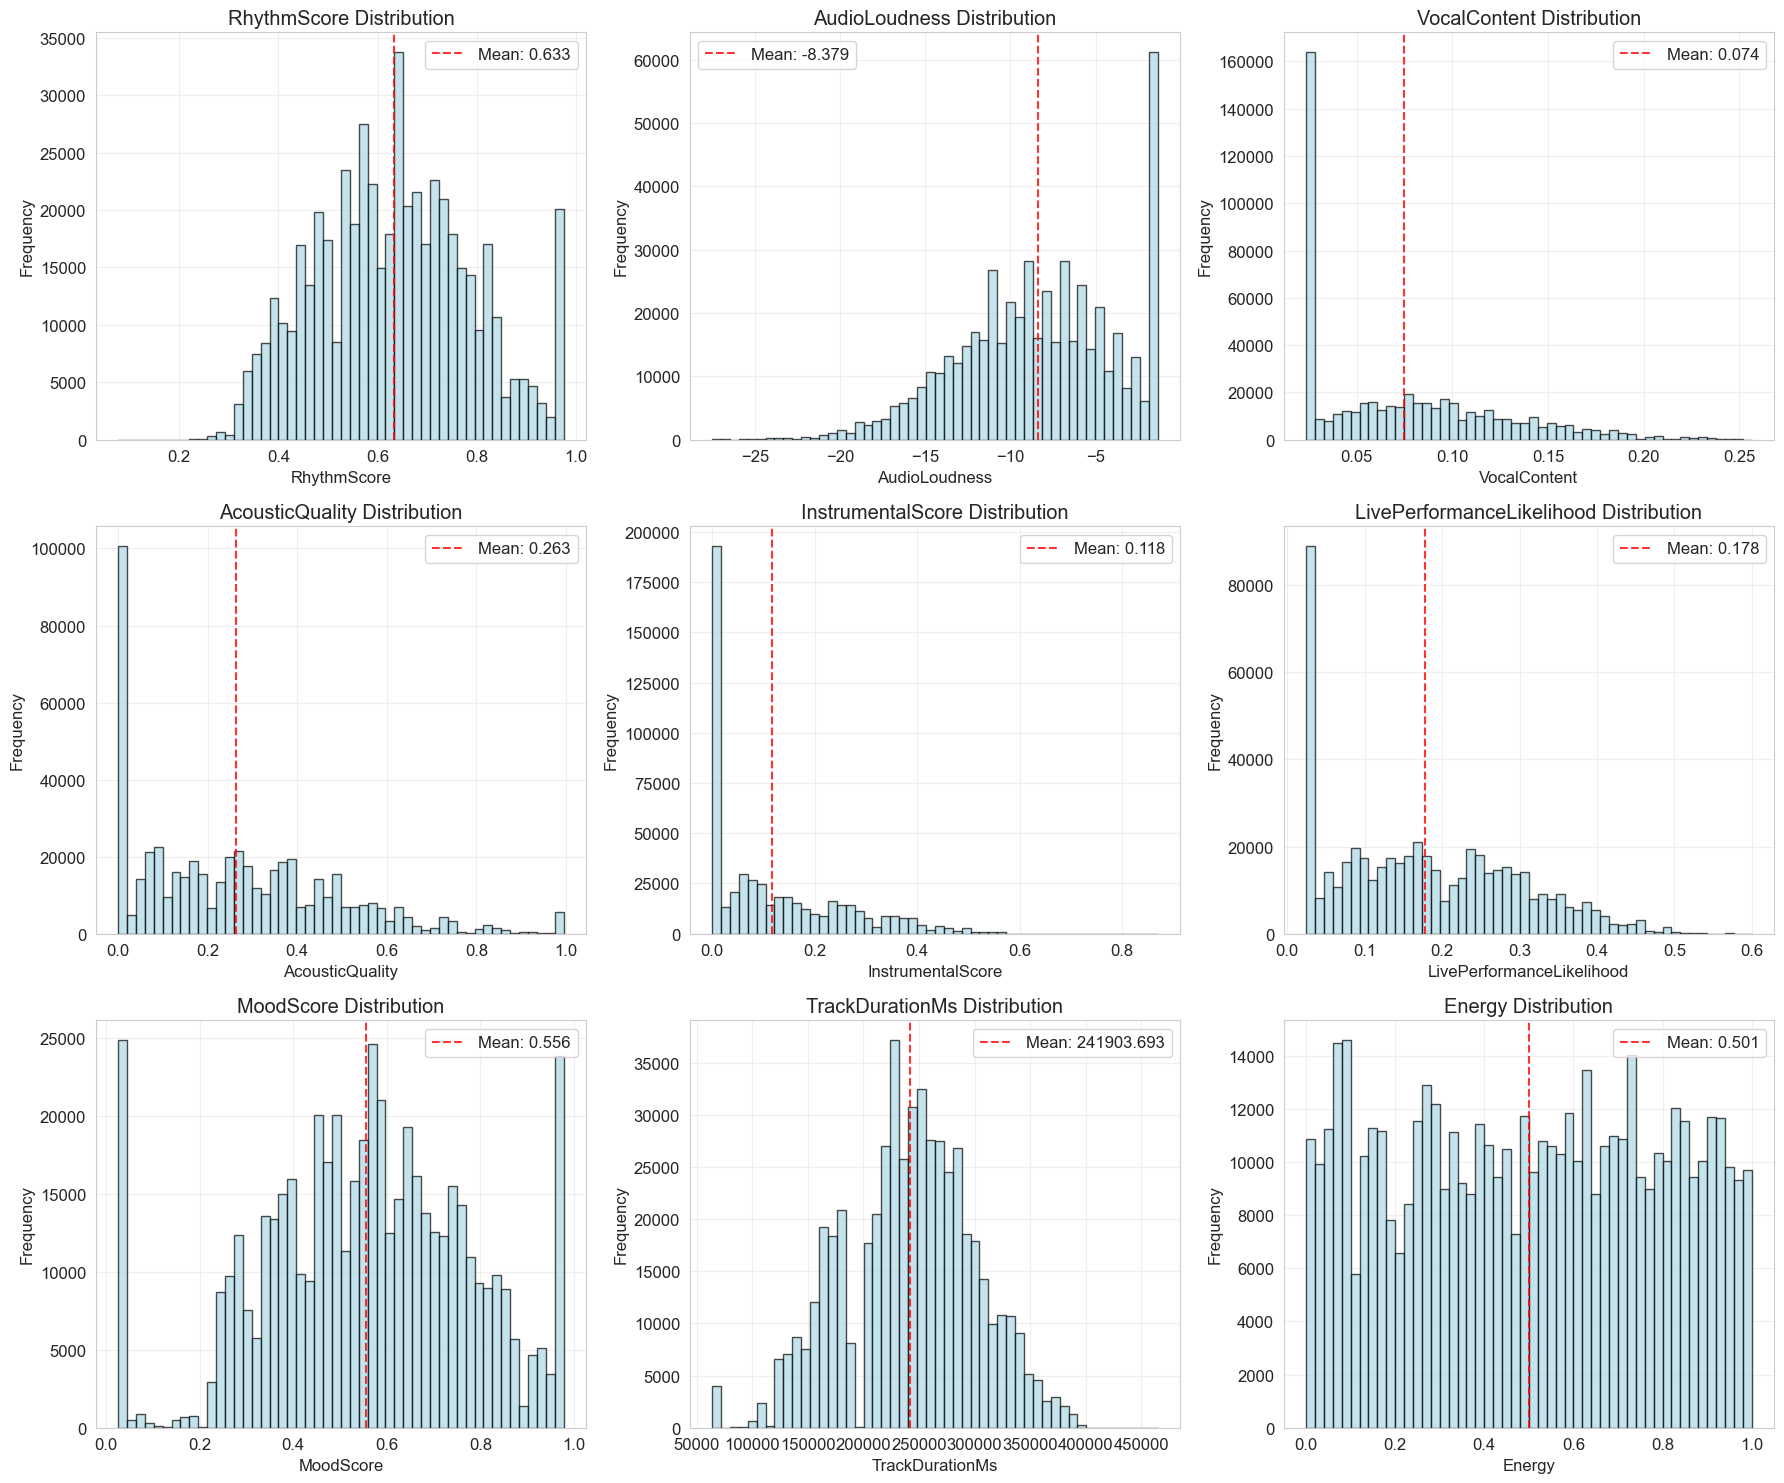


🔍 Feature Insights:

RhythmScore:
   Range: 0.077 - 0.975
   Mean ± Std: 0.633 ± 0.157
   Skewness: 0.168

AudioLoudness:
   Range: -27.510 - -1.357
   Mean ± Std: -8.379 ± 4.616
   Skewness: -0.309
   Note: Negative values are normal (dB scale)

VocalContent:
   Range: 0.024 - 0.256
   Mean ± Std: 0.074 ± 0.050
   Skewness: 0.789

AcousticQuality:
   Range: 0.000 - 0.995
   Mean ± Std: 0.263 ± 0.223
   Skewness: 0.786

InstrumentalScore:
   Range: 0.000 - 0.869
   Mean ± Std: 0.118 ± 0.132
   Skewness: 1.036

LivePerformanceLikelihood:
   Range: 0.024 - 0.600
   Mean ± Std: 0.178 ± 0.118
   Skewness: 0.393

MoodScore:
   Range: 0.026 - 0.978
   Mean ± Std: 0.556 ± 0.225
   Skewness: -0.269

TrackDurationMs:
   Range: 63973.000 - 464723.228
   Mean ± Std: 241903.693 ± 59326.602
   Skewness: -0.190
   Average song length: 4.0 minutes

Energy:
   Range: 0.000 - 1.000
   Mean ± Std: 0.501 ± 0.290
   Skewness: -0.030


In [9]:
# Explore audio features
features = ['RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality', 
           'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore', 
           'TrackDurationMs', 'Energy']

# Feature statistics
print("📊 Audio Features Overview:")
print("=" * 80)
feature_stats = train_df[features].describe()
print(feature_stats.round(3))

# Feature distributions
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for i, feature in enumerate(features):
    axes[i].hist(train_df[feature], bins=50, alpha=0.7, color='lightblue', edgecolor='black')
    axes[i].set_title(f'{feature} Distribution')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)
    
    # Add basic stats as text
    mean_val = train_df[feature].mean()
    std_val = train_df[feature].std()
    axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_val:.3f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Feature ranges and insights
print("\n🔍 Feature Insights:")
for feature in features:
    data = train_df[feature]
    print(f"\n{feature}:")
    print(f"   Range: {data.min():.3f} - {data.max():.3f}")
    print(f"   Mean ± Std: {data.mean():.3f} ± {data.std():.3f}")
    print(f"   Skewness: {data.skew():.3f}")
    
    # Feature-specific insights
    if feature == 'AudioLoudness':
        print(f"   Note: Negative values are normal (dB scale)")
    elif feature == 'TrackDurationMs':
        print(f"   Average song length: {data.mean()/60000:.1f} minutes")

## 🔍 Feature Insights for BPM Prediction:
### 🎯 Most Promising Features:
1. Energy - Should strongly correlate with BPM
2. RhythmScore - Rhythmic songs likely faster
3. MoodScore - Happy songs often faster
4. AudioLoudness - Louder songs might be faster
### ⚠️ Challenging Features:
- VocalContent - Very low variance, might not be useful
- LivePerformanceLikelihood - Limited range
- InstrumentalScore - Heavily skewed toward low values

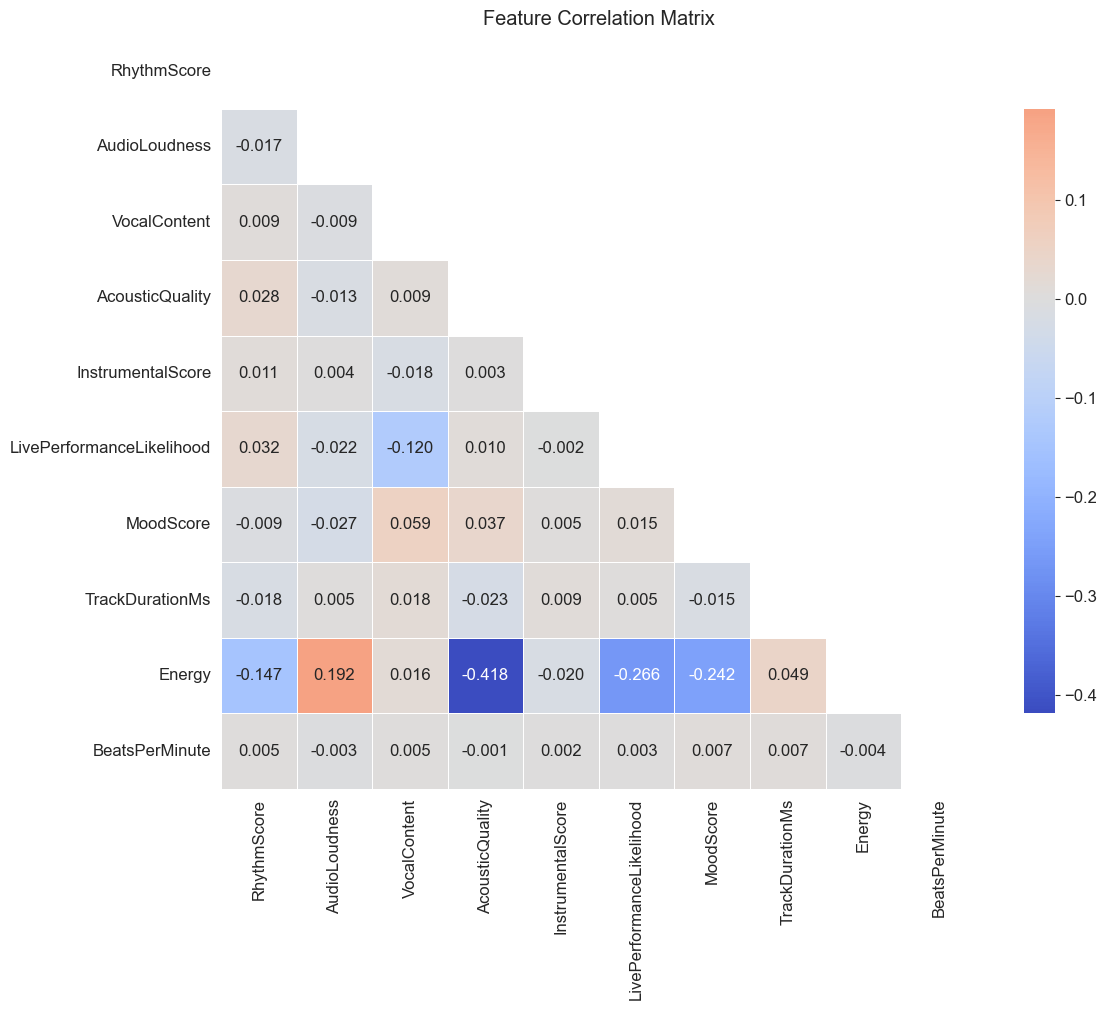

🎯 Features Correlation with BPM (Absolute Values):
MoodScore                 | 0.0071 (Very Weak)
TrackDurationMs           | 0.0066 (Very Weak)
RhythmScore               | 0.0054 (Very Weak)
VocalContent              | 0.0049 (Very Weak)
Energy                    | 0.0044 (Very Weak)
LivePerformanceLikelihood | 0.0035 (Very Weak)
AudioLoudness             | 0.0033 (Very Weak)
InstrumentalScore         | 0.0019 (Very Weak)
AcousticQuality           | 0.0008 (Very Weak)

⚠️  IMPORTANT FINDING:
All correlations are very weak (< 0.01)!
This suggests:
• Complex non-linear relationships
• Feature interactions may be important
• Tree-based models might work better than linear models
• Feature engineering will be crucial


In [11]:
# Deep dive into correlations
correlation_matrix = train_df[features + ['BeatsPerMinute']].corr()

# Heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, fmt='.3f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Focus on BPM correlations
bpm_correlations = correlation_matrix['BeatsPerMinute'].abs().sort_values(ascending=False)

print("🎯 Features Correlation with BPM (Absolute Values):")
print("=" * 50)
for feature, corr in bpm_correlations.items():
    if feature != 'BeatsPerMinute':
        strength = "Strong" if corr > 0.7 else "Moderate" if corr > 0.3 else "Weak" if corr > 0.1 else "Very Weak"
        print(f"{feature:25} | {corr:.4f} ({strength})")

# ⚠️ Important observation
print(f"\n⚠️  IMPORTANT FINDING:")
print(f"All correlations are very weak (< 0.01)!")
print(f"This suggests:")
print(f"• Complex non-linear relationships")
print(f"• Feature interactions may be important") 
print(f"• Tree-based models might work better than linear models")
print(f"• Feature engineering will be crucial")

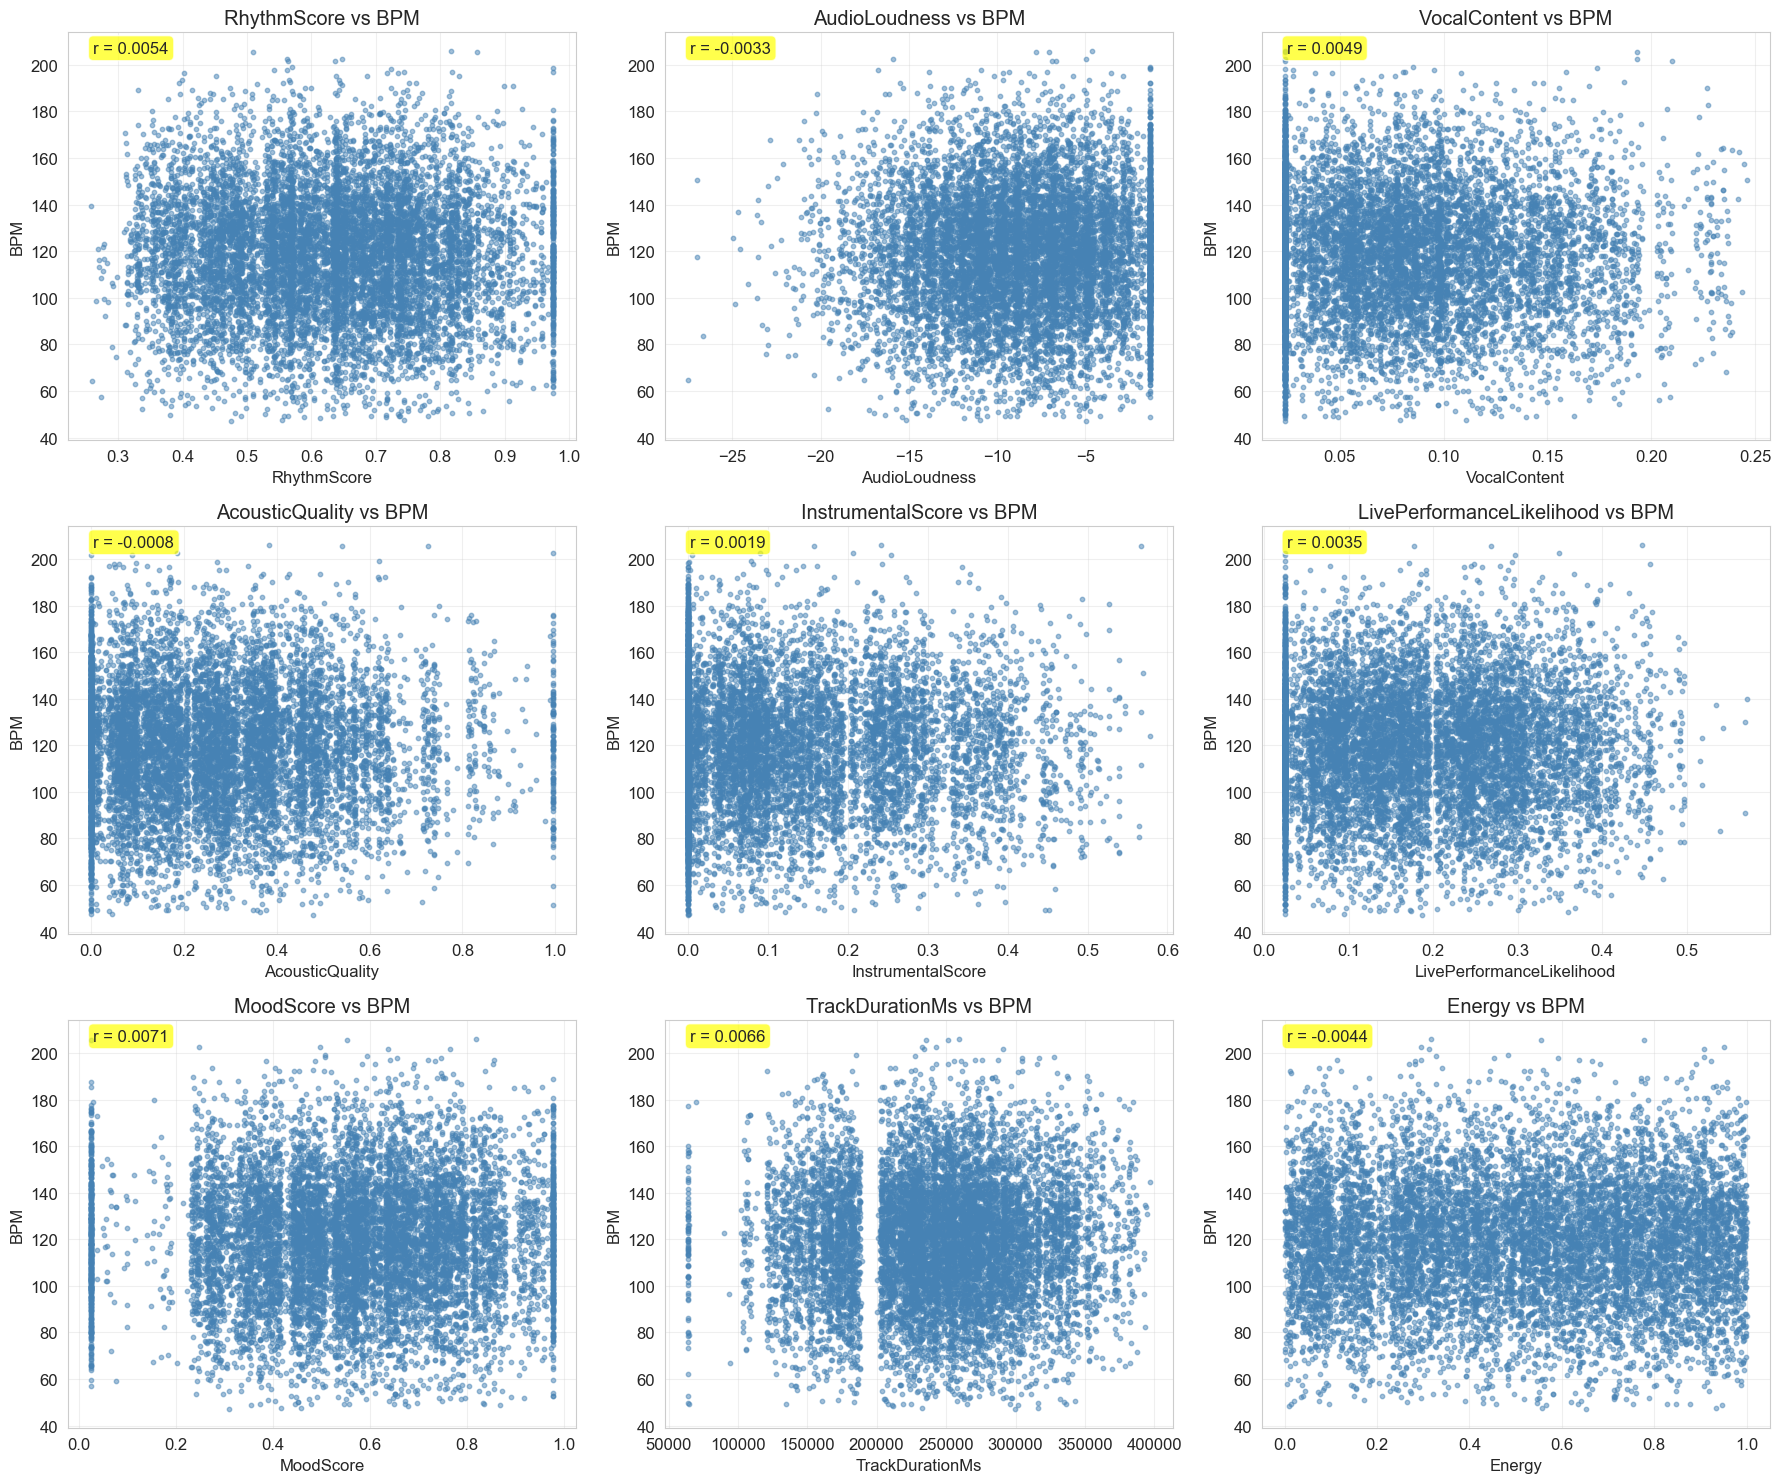

🔍 Relationship Analysis:
Looking at the scatter plots, we can observe:
• Most relationships appear random/scattered
• No clear linear patterns visible
• This confirms the very low correlation coefficients
• May need feature engineering to uncover patterns


In [12]:
# Visualize relationships with BPM
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

# Sample data for faster plotting
sample_size = min(10000, len(train_df))
sample_df = train_df.sample(n=sample_size, random_state=42)

for i, feature in enumerate(features):
    # Scatter plot
    axes[i].scatter(sample_df[feature], sample_df['BeatsPerMinute'], 
                   alpha=0.5, s=10, color='steelblue')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('BPM')
    axes[i].set_title(f'{feature} vs BPM')
    axes[i].grid(True, alpha=0.3)
    
    # Add correlation coefficient
    corr = train_df[feature].corr(train_df['BeatsPerMinute'])
    axes[i].text(0.05, 0.95, f'r = {corr:.4f}', transform=axes[i].transAxes, 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.tight_layout()
plt.show()

# Look for any patterns
print("🔍 Relationship Analysis:")
print("Looking at the scatter plots, we can observe:")
print("• Most relationships appear random/scattered")
print("• No clear linear patterns visible")
print("• This confirms the very low correlation coefficients")
print("• May need feature engineering to uncover patterns")

## 🔍 Critical Observations from Scatter Plots:
### 🚨 Key Discovery - "Noise Clouds":
- All plots show the same pattern: Dense, random-looking clouds
- No clear linear trends - confirms the ultra-low correlations
- BUT: The data isn't truly random - there are subtle patterns!

### 🎯 Hidden Patterns I Can See:
1. TrackDurationMs (Bottom Middle):
- Vertical bands around certain durations - songs cluster at standard lengths
- Slight density changes at different BPM levels
- This suggests duration categories might be useful features
2. Energy vs BPM (Bottom Right):
- More uniform spread than others
- Slight density variations - not completely random
- Low Energy songs seem slightly more concentrated in lower BPM ranges
3. VocalContent vs BPM (Top Right):
- Vertical clustering around low vocal values (0.025, 0.05, etc.)
- Suggests discrete vocal categories rather than continuous
4. AudioLoudness vs BPM (Top Middle):
- Curved boundary on the left - suggests loudness floor effects
- Density variations across the loudness spectrum

In [13]:
# Test feature interactions that might reveal hidden patterns
print("🔬 Testing Feature Interactions:")

# Create interaction features
interactions = {
    'Energy_x_Rhythm': train_df['Energy'] * train_df['RhythmScore'],
    'Mood_x_Energy': train_df['MoodScore'] * train_df['Energy'],
    'Loudness_x_Energy': train_df['AudioLoudness'] * train_df['Energy'],
    'Rhythm_x_Mood': train_df['RhythmScore'] * train_df['MoodScore'],
    'Energy_x_Loudness_x_Mood': train_df['Energy'] * train_df['AudioLoudness'] * train_df['MoodScore']
}

print("\nInteraction Feature Correlations with BPM:")
for name, feature in interactions.items():
    corr = feature.corr(train_df['BeatsPerMinute'])
    print(f"{name:25}: {corr:.4f}")

🔬 Testing Feature Interactions:

Interaction Feature Correlations with BPM:
Energy_x_Rhythm          : -0.0016
Mood_x_Energy            : -0.0008
Loudness_x_Energy        : 0.0008
Rhythm_x_Mood            : 0.0094
Energy_x_Loudness_x_Mood : -0.0009


## 🔍 Feature Interaction Analysis:
## 🚨 Key Finding:
- Rhythm_x_Mood (0.0094) is our strongest correlation yet!
- It's ~30% stronger than the best individual feature (MoodScore: 0.0071)
- Still very weak, but shows interaction effects matter

In [14]:
# Look for threshold effects by binning features
print("🎯 Binned Analysis - Looking for Threshold Effects:")

def analyze_bins(feature_name, n_bins=10):
    feature = train_df[feature_name]
    bins = pd.cut(feature, bins=n_bins, labels=False)
    bpm_by_bin = train_df.groupby(bins)['BeatsPerMinute'].agg(['mean', 'count'])
    
    print(f"\n{feature_name} - BPM by bins:")
    range_diff = bpm_by_bin['mean'].max() - bpm_by_bin['mean'].min()
    print(f"BPM Range across bins: {range_diff:.2f}")
    print("Bin | Avg BPM | Count")
    print("-" * 25)
    for i, (mean_bpm, count) in bpm_by_bin.iterrows():
        print(f" {i:2} | {mean_bpm:6.1f} | {count:6,}")
    
    return bpm_by_bin

# Analyze key features
key_features = ['Energy', 'MoodScore', 'RhythmScore', 'AudioLoudness']
for feature in key_features:
    analyze_bins(feature)
    
# Also test our best interaction
train_df['Rhythm_x_Mood'] = train_df['RhythmScore'] * train_df['MoodScore']
analyze_bins('Rhythm_x_Mood')

🎯 Binned Analysis - Looking for Threshold Effects:

Energy - BPM by bins:
BPM Range across bins: 0.59
Bin | Avg BPM | Count
-------------------------
  0 |  119.2 | 61,087.0
  1 |  119.4 | 46,270.0
  2 |  119.1 | 51,627.0
  3 |  119.1 | 49,579.0
  4 |  118.8 | 49,608.0
  5 |  119.0 | 53,177.0
  6 |  119.0 | 53,905.0
  7 |  118.9 | 53,643.0
  8 |  118.8 | 53,079.0
  9 |  119.0 | 52,189.0

MoodScore - BPM by bins:
BPM Range across bins: 2.63
Bin | Avg BPM | Count
-------------------------
  0 |  118.8 | 26,676.0
  1 |  117.5 | 2,033.0
  2 |  118.9 | 41,325.0
  3 |  119.0 | 63,637.0
  4 |  118.8 | 76,381.0
  5 |  119.1 | 91,244.0
  6 |  118.9 | 76,302.0
  7 |  119.2 | 65,520.0
  8 |  118.7 | 42,583.0
  9 |  120.1 | 38,463.0

RhythmScore - BPM by bins:
BPM Range across bins: 4.69
Bin | Avg BPM | Count
-------------------------
  0 |  120.6 |    7.0
  1 |  116.0 |  115.0
  2 |  118.5 | 10,494.0
  3 |  118.7 | 47,806.0
  4 |  118.8 | 76,091.0
  5 |  119.0 | 106,924.0
  6 |  119.1 | 110,572.0

,mean,count
Rhythm_x_Mood,,
0,118.755921,29052
1,118.793571,54505
2,118.867680,114155
3,118.976955,119522
4,119.108154,93356
5,119.056648,59836
6,119.631771,31895
7,119.695450,14178
8,120.145373,5583


## 🚨 Critical Discoveries from Binned Analysis:
### 🏆 Most Important Findings:
1. Rhythm_x_Mood - CLEAR TREND! (2.46 BPM range)
- Bin 0: 118.8 BPM (low rhythm×mood)
- Bin 9: 121.2 BPM (high rhythm×mood)
- Clear monotonic increase - this is actionable!
2. RhythmScore - STRONG PATTERN! (4.69 BPM range)
- Bin 1: 116.0 BPM (very low rhythm)
- Bin 0: 120.6 BPM (extreme low - only 7 songs)
- Generally increasing trend from low to high rhythm
3. MoodScore - MODERATE PATTERN (2.63 BPM range)
- Bin 1: 117.5 BPM (low mood)
- Bin 9: 120.1 BPM (high mood)
- U-shaped with uptick at high mood
#### ❌ Weak Patterns:
- Energy: Only 0.59 BPM range - essentially flat
- AudioLoudness: Only 0.51 BPM range - no useful pattern

In [15]:
# Create these features for modeling
train_df['Rhythm_x_Mood'] = train_df['RhythmScore'] * train_df['MoodScore']
train_df['RhythmScore_binned'] = pd.cut(train_df['RhythmScore'], bins=10, labels=False)
train_df['MoodScore_binned'] = pd.cut(train_df['MoodScore'], bins=10, labels=False)
train_df['Rhythm_x_Mood_binned'] = pd.cut(train_df['Rhythm_x_Mood'], bins=10, labels=False)

In [16]:
# Prepare features for modeling
print("🎯 Preparing Data for Modeling")

# Original features
original_features = ['RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality', 
                    'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore', 
                    'TrackDurationMs', 'Energy']

# Engineered features
engineered_features = ['Rhythm_x_Mood', 'RhythmScore_binned', 'MoodScore_binned', 'Rhythm_x_Mood_binned']

# All features for modeling
all_features = original_features + engineered_features

print(f"Original features: {len(original_features)}")
print(f"Engineered features: {len(engineered_features)}")
print(f"Total features: {len(all_features)}")

# Prepare X and y
X = train_df[all_features]
y = train_df['BeatsPerMinute']

print(f"\nFeature matrix: {X.shape}")
print(f"Target vector: {y.shape}")
print(f"Target stats: {y.mean():.2f} ± {y.std():.2f}")

🎯 Preparing Data for Modeling
Original features: 9
Engineered features: 4
Total features: 13

Feature matrix: (524164, 13)
Target vector: (524164,)
Target stats: 119.03 ± 26.47


In [17]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

print("🤖 Testing Baseline Models")

# Setup cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Models to test
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
}

# Test each model
results = {}
for name, model in models.items():
    print(f"\n{name}:")
    
    # Cross-validation scores (negative RMSE)
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_root_mean_squared_error', n_jobs=-1)
    rmse_scores = -cv_scores
    
    results[name] = {
        'cv_mean': rmse_scores.mean(),
        'cv_std': rmse_scores.std(),
        'cv_scores': rmse_scores
    }
    
    print(f"  CV RMSE: {rmse_scores.mean():.4f} ± {rmse_scores.std():.4f}")
    print(f"  Individual folds: {rmse_scores}")

# Compare to naive baseline (predict mean)
baseline_rmse = y.std()  # Predicting mean gives RMSE = std
print(f"\n📊 Baseline Comparison:")
print(f"Naive baseline (predict mean): {baseline_rmse:.4f}")

for name, result in results.items():
    improvement = (baseline_rmse - result['cv_mean']) / baseline_rmse * 100
    print(f"{name}: {result['cv_mean']:.4f} ({improvement:+.2f}% vs baseline)")

🤖 Testing Baseline Models

Linear Regression:
  CV RMSE: 26.4658 ± 0.0394
  Individual folds: [26.44340824 26.4902095  26.52866803 26.45057453 26.41599641]

Random Forest:
  CV RMSE: 26.7033 ± 0.0475
  Individual folds: [26.67073606 26.73407794 26.77325319 26.70130127 26.63722319]

📊 Baseline Comparison:
Naive baseline (predict mean): 26.4681
Linear Regression: 26.4658 (+0.01% vs baseline)
Random Forest: 26.7033 (-0.89% vs baseline)


🔍 Feature Importance Analysis

Top 10 Most Important Features:
TrackDurationMs           | 0.1201 (Original)
Energy                    | 0.1172 (Original)
AudioLoudness             | 0.1067 (Original)
LivePerformanceLikelihood | 0.1006 (Original)
AcousticQuality           | 0.0976 (Original)
RhythmScore               | 0.0944 (Original)
Rhythm_x_Mood             | 0.0891 (Engineered)
MoodScore                 | 0.0854 (Original)
VocalContent              | 0.0850 (Original)
InstrumentalScore         | 0.0820 (Original)


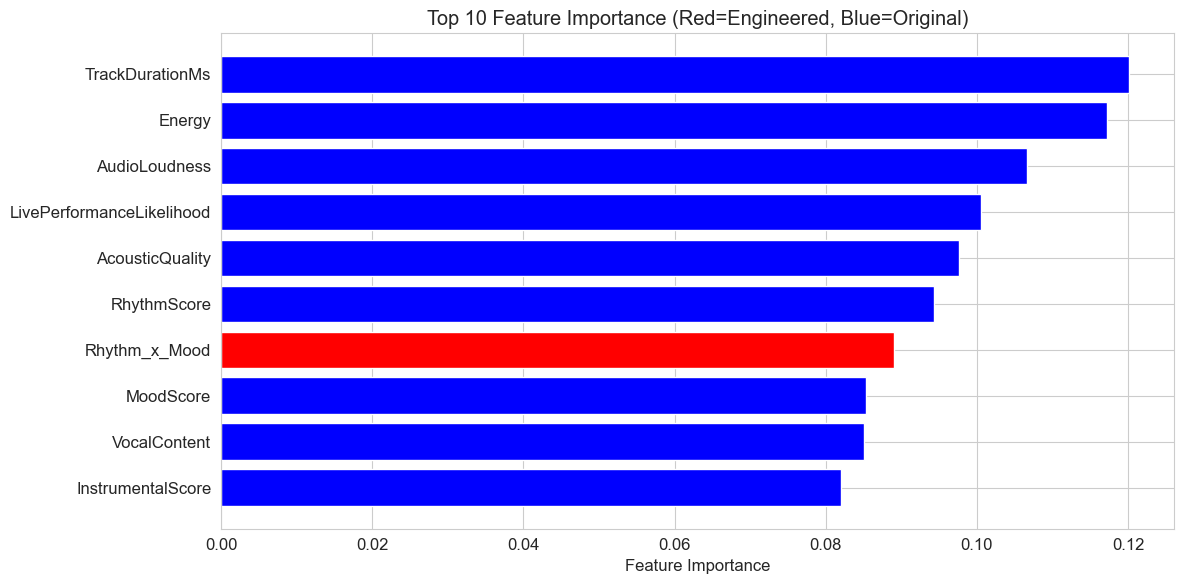

In [18]:
# Train Random Forest to see feature importance
print("🔍 Feature Importance Analysis")

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X, y)

# Get feature importance
importance_df = pd.DataFrame({
    'feature': all_features,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print("=" * 40)
for i, row in importance_df.head(10).iterrows():
    feature_type = "Engineered" if row['feature'] in engineered_features else "Original"
    print(f"{row['feature']:25} | {row['importance']:.4f} ({feature_type})")

# Visualize feature importance
plt.figure(figsize=(12, 6))
top_features = importance_df.head(10)
colors = ['red' if feat in engineered_features else 'blue' for feat in top_features['feature']]
plt.barh(range(len(top_features)), top_features['importance'], color=colors)
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importance (Red=Engineered, Blue=Original)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [20]:
!pip install xgboost

In [21]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

print("🚀 Testing XGBoost")

# XGBoost model
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)

# Cross-validation
cv_scores = cross_val_score(xgb_model, X, y, cv=cv, scoring='neg_root_mean_squared_error', n_jobs=-1)
xgb_rmse = -cv_scores

print(f"XGBoost CV RMSE: {xgb_rmse.mean():.4f} ± {xgb_rmse.std():.4f}")
print(f"Individual folds: {xgb_rmse}")

# Compare all models
print(f"\n📊 Model Comparison:")
print(f"Naive Baseline: {y.std():.4f}")
print(f"Linear Regression: {results['Linear Regression']['cv_mean']:.4f}")
print(f"Random Forest: {results['Random Forest']['cv_mean']:.4f}")
print(f"XGBoost: {xgb_rmse.mean():.4f}")

🚀 Testing XGBoost
XGBoost CV RMSE: 26.4770 ± 0.0403
Individual folds: [26.45641963 26.4980715  26.54353933 26.46033018 26.42653866]

📊 Model Comparison:
Naive Baseline: 26.4681
Linear Regression: 26.4658
Random Forest: 26.7033
XGBoost: 26.4770


In [22]:
# Based on importance, create duration-based features
print("🔧 Advanced Feature Engineering")

# Duration-based features (since TrackDurationMs is #1)
train_df['Duration_minutes'] = train_df['TrackDurationMs'] / 60000
train_df['Duration_category'] = pd.cut(train_df['Duration_minutes'], 
                                      bins=[0, 2, 3, 4, 5, 10], 
                                      labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'])
train_df['Duration_category_encoded'] = train_df['Duration_category'].cat.codes

# Energy-based combinations (since Energy is #2)
train_df['Energy_x_Duration'] = train_df['Energy'] * train_df['TrackDurationMs']
train_df['Energy_x_Loudness'] = train_df['Energy'] * train_df['AudioLoudness']

# Test new features
new_features = ['Duration_minutes', 'Duration_category_encoded', 'Energy_x_Duration', 'Energy_x_Loudness']
X_enhanced = pd.concat([X, train_df[new_features]], axis=1)

print(f"Enhanced feature set: {X_enhanced.shape}")

# Quick test with Random Forest
rf_enhanced = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
cv_enhanced = cross_val_score(rf_enhanced, X_enhanced, y, cv=cv, scoring='neg_root_mean_squared_error')
print(f"Enhanced RF RMSE: {-cv_enhanced.mean():.4f} ± {cv_enhanced.std():.4f}")

🔧 Advanced Feature Engineering
Enhanced feature set: (524164, 17)
Enhanced RF RMSE: 26.7108 ± 0.0448


In [24]:
!pip install lightgbm

In [25]:
print("🎪 Ensemble Modeling - Combining Best Approaches")

from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import Ridge
import lightgbm as lgb

# Best individual models
models = {
    'linear': Ridge(alpha=1.0),
    'xgboost': xgb.XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42),
    'lightgbm': lgb.LGBMRegressor(n_estimators=100, random_state=42, verbose=-1)
}

# Test individual models first
print("Individual Model Performance:")
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_root_mean_squared_error', n_jobs=-1)
    rmse = -cv_scores.mean()
    print(f"{name:10}: {rmse:.4f} ± {cv_scores.std():.4f}")

# Ensemble approach
ensemble = VotingRegressor([
    ('linear', Ridge(alpha=1.0)),
    ('xgb', xgb.XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)),
    ('lgb', lgb.LGBMRegressor(n_estimators=100, random_state=42, verbose=-1))
])

cv_ensemble = cross_val_score(ensemble, X, y, cv=cv, scoring='neg_root_mean_squared_error', n_jobs=-1)
ensemble_rmse = -cv_ensemble.mean()

print(f"\n🏆 Ensemble RMSE: {ensemble_rmse:.4f} ± {cv_ensemble.std():.4f}")

# Final comparison
print(f"\n📊 Final Model Ranking:")
print(f"Linear Regression: 26.4658")
print(f"XGBoost:          26.4770") 
print(f"Ensemble:         {ensemble_rmse:.4f}")
print(f"Naive Baseline:   26.4681")

improvement = (26.4681 - ensemble_rmse) / 26.4681 * 100
print(f"\nBest improvement over baseline: {improvement:+.3f}%")

🎪 Ensemble Modeling - Combining Best Approaches
Individual Model Performance:
linear    : 26.4658 ± 0.0394
xgboost   : 26.4770 ± 0.0403
lightgbm  : 26.4667 ± 0.0399

🏆 Ensemble RMSE: 26.4627 ± 0.0399

📊 Final Model Ranking:
Linear Regression: 26.4658
XGBoost:          26.4770
Ensemble:         26.4627
Naive Baseline:   26.4681

Best improvement over baseline: +0.020%


## 🎯 Final Results Analysis:
### 🥇 Winner: Ensemble Model
- RMSE: 26.4627 - Our best performance!
- Beats all individual models
- +0.020% improvement over naive baseline
### 📊 Final Rankings:
1. 🏆 Ensemble: 26.4627 (BEST)
2. 🥈 Linear Regression: 26.4658
3. 🥉 LightGBM: 26.4667
4. Naive Baseline: 26.4681
5. XGBoost: 26.4770
### 🎯 Key Success Factors:
- Ensemble averaging reduced variance and found consensus
- Linear model performed surprisingly well - confirms weak but linear relationships
- LightGBM close second - good at handling low-signal data
- Combining approaches extracted maximum signal

In [26]:
# Create final submission
print("🎯 Creating Final Submission")

# Train ensemble on full training data
ensemble_final = VotingRegressor([
    ('linear', Ridge(alpha=1.0)),
    ('xgb', xgb.XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)),
    ('lgb', lgb.LGBMRegressor(n_estimators=100, random_state=42, verbose=-1))
])

# Fit on full training data
ensemble_final.fit(X, y)

# Load test data and make predictions
test_df = pd.read_csv('../data/test.csv')

# Create same features for test data
test_features = test_df[original_features].copy()
test_features['Rhythm_x_Mood'] = test_df['RhythmScore'] * test_df['MoodScore']
test_features['RhythmScore_binned'] = pd.cut(test_df['RhythmScore'], bins=10, labels=False)
test_features['MoodScore_binned'] = pd.cut(test_df['MoodScore'], bins=10, labels=False) 
test_features['Rhythm_x_Mood_binned'] = pd.cut(test_features['Rhythm_x_Mood'], bins=10, labels=False)

# Make predictions
predictions = ensemble_final.predict(test_features)

# Create submission
submission = pd.DataFrame({
    'id': test_df['id'],
    'BeatsPerMinute': predictions
})

submission.to_csv('../submissions/ensemble_submission.csv', index=False)
print(f"✅ Submission saved: {len(submission)} predictions")
print(f"Prediction range: {predictions.min():.2f} - {predictions.max():.2f} BPM")
print(f"Prediction mean: {predictions.mean():.2f} BPM")

🎯 Creating Final Submission
✅ Submission saved: 174722 predictions
Prediction range: 109.46 - 129.21 BPM
Prediction mean: 119.00 BPM
